In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

In [3]:
np.shape(x)

(200, 2)

Use `least_squares` to compute w, and visualize the results.

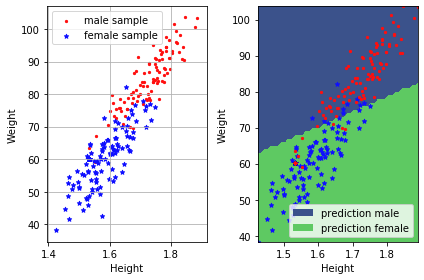

In [4]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx and y
    w = least_squares(y, tx)
    #raise NotImplementedError

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [5]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return 1/(1+np.exp(-t))
    raise NotImplementedError

In [6]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    loss = 0
    for i in range(len(y)):
        loss = loss + y[i]*np.log(sigmoid(np.matmul(tx[i],w))) + (1-y[i])*np.log(1-sigmoid(np.matmul(tx[i],w)))
        
    loss = loss*-1/len(y)
    return loss
    
    raise NotImplementedError

In [106]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    grad = sigmoid(np.matmul(tx,w)) - y
    grad = np.matmul(np.transpose(tx),grad)
    return grad
    
    raise NotImplementedError

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [107]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the loss: TODO
    # ***************************************************
    loss = calculate_loss(y,tx,w)
    grad = calculate_gradient(y,tx,w)
    w = w - grad*gamma
    
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    #raise NotImplementedError
    
    return loss, w

In [108]:
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))

(learning_by_gradient_descent(y, tx, w, 0.1)[1])

array([[ 0.2       ],
       [-6.8746037 ],
       [-7.96130209]])

Demo!

Current iteration=0, loss=[0.69314718]
Current iteration=100, loss=[0.21732016]
Current iteration=200, loss=[0.20772946]
Current iteration=300, loss=[0.20549319]
Current iteration=400, loss=[0.20482435]
Current iteration=500, loss=[0.20460045]
Current iteration=600, loss=[0.20452094]
Current iteration=700, loss=[0.20449175]
Current iteration=800, loss=[0.20448082]
Current iteration=900, loss=[0.20447669]
loss=[0.20447515]


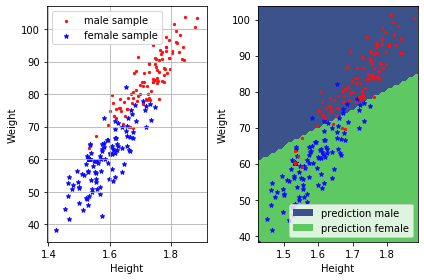

In [109]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [110]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    pred = sigmoid(tx.dot(w))
    pred = np.diag(pred.T[0])
    r = np.multiply(pred, (1-pred))
    return tx.T.dot(r).dot(tx)


Write a function below to return loss, gradient, and Hessian.

In [111]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [112]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, gradient, hessian = logistic_regression(y, tx, w)
    w -= gamma*np.linalg.solve(hessian, gradient)
    return loss, w

demo

Current iteration=0, the loss=[0.69314718]
Current iteration=1, the loss=[0.38349241]
Current iteration=2, the loss=[0.28488468]
Current iteration=3, the loss=[0.23707129]
Current iteration=4, the loss=[0.21523296]
Current iteration=5, the loss=[0.20710997]
Current iteration=6, the loss=[0.20492573]
Current iteration=7, the loss=[0.20453021]
Current iteration=8, the loss=[0.20447985]
Current iteration=9, the loss=[0.20447467]
Current iteration=10, the loss=[0.20447418]
Current iteration=11, the loss=[0.20447413]
Current iteration=12, the loss=[0.20447413]
loss=[0.20447413]


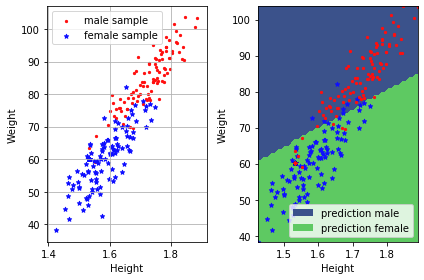

In [113]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 0.7
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

Current iteration=0, loss=[0.69314718]
Current iteration=100, loss=[0.20902427]
loss=[0.20902385]


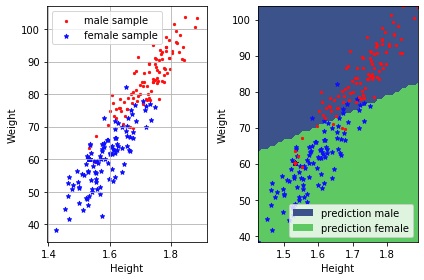

In [117]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss and gradient."""
    num_samples = y.shape[0]
    loss = calculate_loss(y, tx, w) 
    #+ lambda_ *np.linalg.norm(w,2)*2
    gradient = calculate_gradient(y, tx, w) + 2 * lambda_ * w
    return loss, gradient
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, grad = penalized_logistic_regression(y, tx, w, lambda_)
    #w -= gradient
    #loss = calculate_loss(y,tx,w)
    #loss = loss+lambda_ *np.linalg.norm(w,2)*2
    #grad = calculate_gradient(y,tx,w)
    #grad = grad - 2 * lambda_*w
    w = w - grad*gamma
    
    return loss, w


def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.1
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)